<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/8_law_of_large_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
plt.style.use('dark_background')


Text(0, 0.5, 'average value')

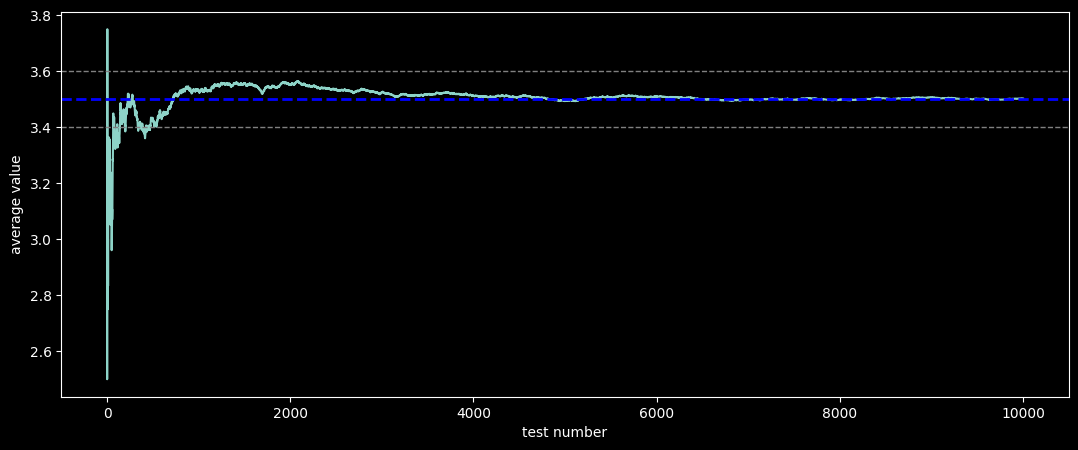

In [5]:
n_obs = 10000
eps = 0.1

# roll the dice many times
x = np.random.choice(np.arange(1,7), size=n_obs)
x_cumsum = np.cumsum(x)
x_mean = x_cumsum/np.arange(1, n_obs + 1)

plt.figure(figsize=(13,5))
plt.plot(x_mean)
plt.axhline(3.5, color='blue', linestyle='dashed', linewidth=2)
plt.axhline(3.5 + eps, color='gray', linestyle='dashed', linewidth=1)
plt.axhline(3.5 - eps, color='gray', linestyle='dashed', linewidth=1)
plt.xlabel('test number')
plt.ylabel('average value')

In [10]:
np.mean(np.arange(1,7))

3.5

(10000, 1000)


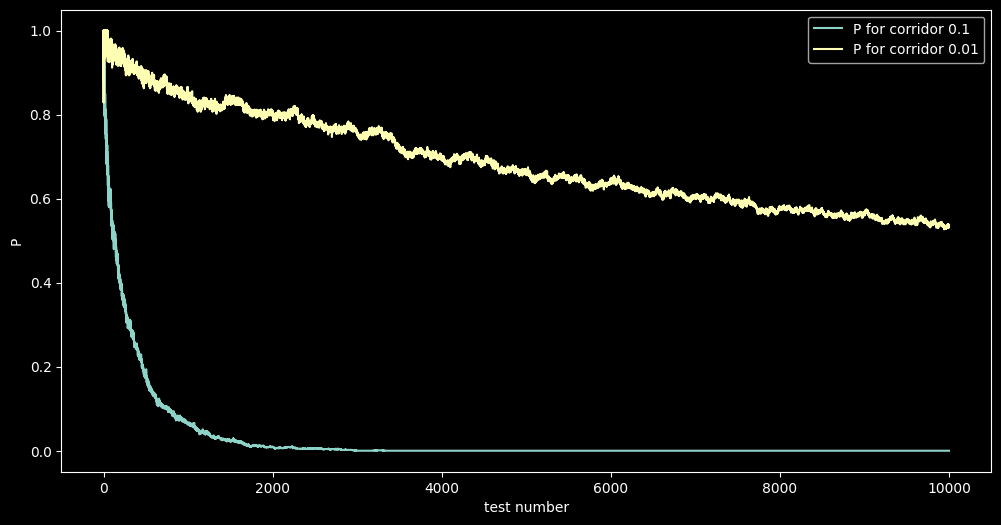

In [11]:
#let's try to estimate the probability that a sequence of averages will break through the corridor we have established at a specific step.

n_obs = 10**4  # great number of trajectories

# roll the dice many 1000 times for every trajectory
x = np.random.choice(np.arange(1,7), size=(n_obs, 1000))
x_cumsum = np.cumsum(x, axis = 0)
x_cumsum = x_cumsum/np.arange(1, n_obs + 1)[:,None]
print(x_cumsum.shape)

eps1 = 0.1
eps2 = 0.01

# all the events when the corridor was breached
bad_events_1 = np.abs(x_cumsum - 3.5) > eps1
bad_events_2 = np.abs(x_cumsum - 3.5) > eps2

# probabilities
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1, label = f"P for corridor {eps1}")
plt.plot(proba_2, label = f"P for corridor {eps2}")
plt.xlabel('test number')
plt.ylabel('P')
plt.legend();
plt.show()

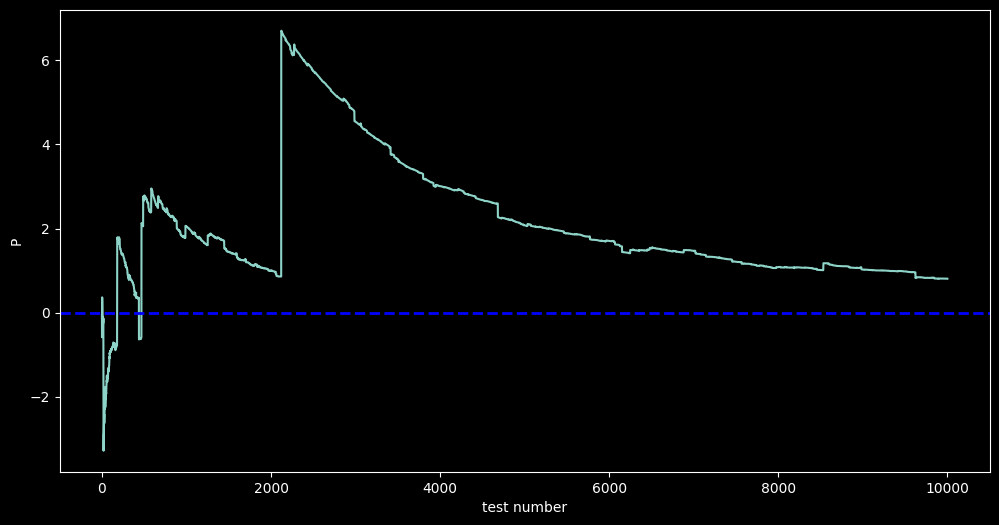

In [30]:
#Cauchy distribution is notable for the fact that it has no expectation
cauchy_rv = sts.cauchy()  # генератор
n_obs = 10**4

x = cauchy_rv.rvs(size = (n_obs,1000))
x_cumsum = np.cumsum(x, axis = 0)
x_mean = x_cumsum/np.arange(1, n_obs + 1)[:,None]

plt.figure(figsize=(12,6))
plt.plot(x_mean[:,442])
plt.axhline(0, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('test number')
plt.ylabel('average value');

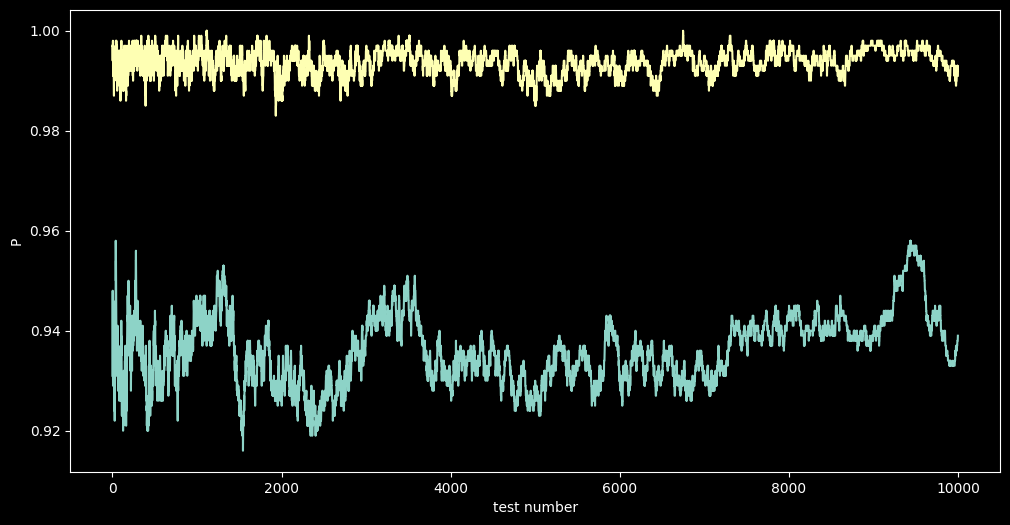

In [31]:
eps1 = 0.1
eps2 = 0.01

# all the events when the corridor was breached
bad_events_1 = np.abs(x_mean - 0) > eps1
bad_events_2 = np.abs(x_mean - 0) > eps2

# probabilities
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1)
plt.plot(proba_2)
plt.xlabel('test number')
plt.ylabel('P');